In [10]:
# https://github.com/kaggle/docker-python
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/drive/MyDrive/FDS/creditcard.csv')

In [5]:
data.Class.value_counts()

,count
Class,
0,284315
1,492


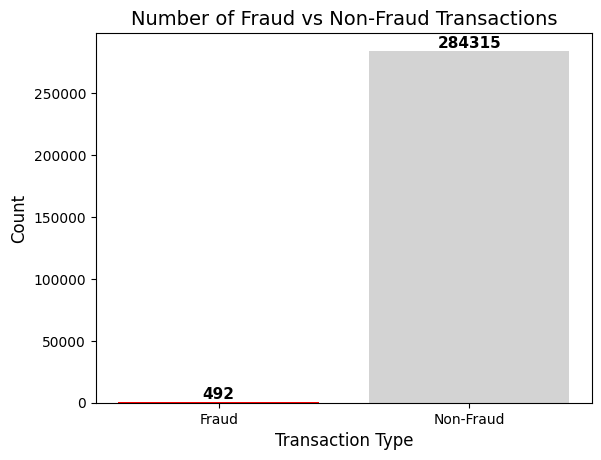

In [7]:
num_nonfraud = np.sum(data['Class'] == 0)
num_fraud = np.sum(data['Class'] == 1)

plt.bar(['Fraud', 'Non-Fraud'], [num_fraud, num_nonfraud], color=['red', 'lightgrey'])
plt.title('Number of Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, value in enumerate([num_fraud, num_nonfraud]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')


plt.show()

In [8]:
data['Hour'] = data["Time"].apply(lambda x : divmod(x, 3600)[0])
X = data.drop(['Time','Class'],axis=1)
Y = data.Class

In [11]:
iforest = IsolationForest()
data['label'] = iforest.fit_predict(X)
data['scores'] = iforest.decision_function(X)
n = 1000
df = data.sort_values(by='scores', ascending=True)
df = df.head(n)
rate = df[df['Class'] == 1].shape[0] / n
print('Top{}의 정확도는: {}'.format(n, rate))

Top1000의 정확도는: 0.203


In [12]:
iforest.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
n_est = list(range(10, 500, 10))
rates = []

for i in n_est:
    iforest = IsolationForest(n_estimators=i,
                              max_samples=256,
                              contamination=0.02,
                              max_features=5,
                              random_state=1
                              )
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class']==1].shape[0] / n
    print('Top{}의 정확도: {}'.format(n, rate))
    rates.append(rate)

Top1000의 정확도: 0.114
Top1000의 정확도: 0.179
Top1000의 정확도: 0.18
Top1000의 정확도: 0.184
Top1000의 정확도: 0.178
Top1000의 정확도: 0.189
Top1000의 정확도: 0.194
Top1000의 정확도: 0.197
Top1000의 정확도: 0.185
Top1000의 정확도: 0.192
Top1000의 정확도: 0.189
Top1000의 정확도: 0.19
Top1000의 정확도: 0.193
Top1000의 정확도: 0.208
Top1000의 정확도: 0.207
Top1000의 정확도: 0.192
Top1000의 정확도: 0.197
Top1000의 정확도: 0.195
Top1000의 정확도: 0.197
Top1000의 정확도: 0.196
Top1000의 정확도: 0.202
Top1000의 정확도: 0.207
Top1000의 정확도: 0.207
Top1000의 정확도: 0.197
Top1000의 정확도: 0.195
Top1000의 정확도: 0.196
Top1000의 정확도: 0.192
Top1000의 정확도: 0.195
Top1000의 정확도: 0.191
Top1000의 정확도: 0.191
Top1000의 정확도: 0.191
Top1000의 정확도: 0.188
Top1000의 정확도: 0.183
Top1000의 정확도: 0.182
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.185
Top1000의 정확도: 0.184
Top1000의 정확도: 0.184
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.184
Top1000의 정확도: 0.183
Top1000의 정확도: 0.186
Top1000의 정확도: 0.185
Top1000의 정확도: 0.184
Top1000의 정확도: 0.185


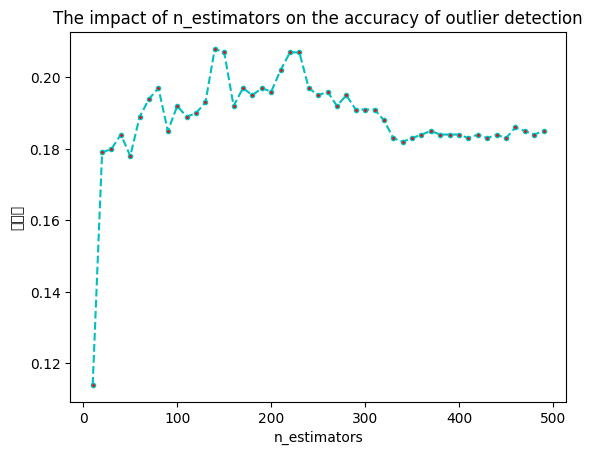

In [15]:
plt.plot(n_est, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.xlabel('n_estimators')
plt.ylabel('정확도')
plt.title('The impact of n_estimators on the accuracy of outlier detection')

plt.show()

Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.184
Top1000의 정확도는: 0.161
Top1000의 정확도는: 0.158
Top1000의 정확도는: 0.166
Top1000의 정확도는: 0.209
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.174
Top1000의 정확도는: 0.169
Top1000의 정확도는: 0.164
Top1000의 정확도는: 0.154
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.17
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.149
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.18
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.187
Top1000의 정확도는: 0.157
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.146
Top1000의 정확도는: 0.23
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.198, 0.195, 0.188, 0.191, 0.192, 0.185, 0.184, 0.161, 0.158, 0.166, 0.209, 0.183, 0.174, 0.169, 0.164, 0.154, 0.167, 0.17, 0.183, 0.149, 0.186, 0.18, 0.183, 0.195, 0.187, 0.157, 0.191, 0.189, 0.146, 0.23]


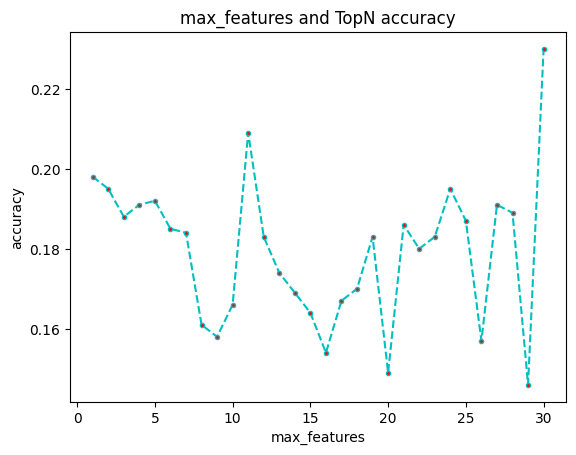

In [16]:
features = list(range(1, X.shape[1]+1))
rates = []
for i in features:
    iforest = IsolationForest(n_estimators=100,
                              max_samples=256,
                              contamination=0.02,
                              max_features=i,
                              random_state=1
                              )
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n, rate))
    rates.append(rate)

print(features)
print(rates)

import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and TopN accuracy')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()


Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.221
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.171
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.193
Top1000의 정확도는: 0.173
Top1000의 정확도는: 0.206
Top1000의 정확도는: 0.194
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.215
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.218
Top1000의 정확도는: 0.178
Top1000의 정확도는: 0.209
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.212
Top1000의 정확도는: 0.18
Top1000의 정확도는: 0.178
Top1000의 정확도는: 0.22
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.195, 0.197, 0.204, 0.183, 0.208, 0.191, 0.221, 0.195, 0.167, 0.204, 0.197, 0.171, 0.182, 0.205, 0.193, 0.173, 0.206, 0.194, 0.224, 0.188, 0.215, 0.189, 0.218, 0.178, 0.209, 0.181, 0.212, 0.18, 0.178, 0.22]


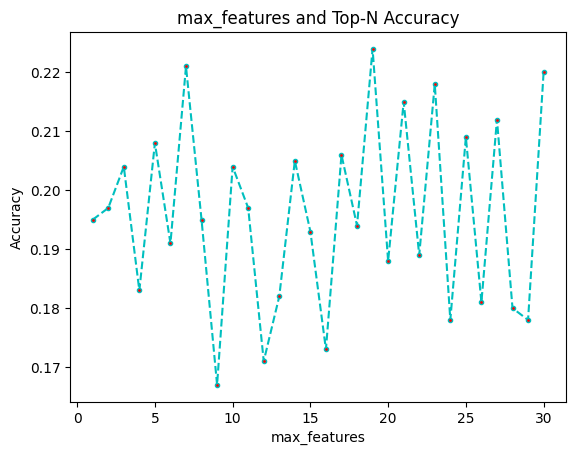

In [17]:
features = list(range(1, X.shape[1]+1))
rates = []

for i in features:
    iforest = IsolationForest(n_estimators=100,
                              max_samples=1200,
                              contamination=0.02,
                              max_features=i,
                              random_state=1
                              )
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n, rate))
    rates.append(rate)

print(features)
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

print(rates)
# [0.198, 0.195, 0.188, 0.191, 0.192, 0.185, 0.184, 0.161, 0.158, 0.166, 0.209, 0.183, 0.174, 0.169, 0.164, 0.154, 0.167, 0.17, 0.183, 0.149, 0.186, 0.18, 0.183, 0.195, 0.187, 0.157, 0.191, 0.189, 0.146, 0.23]

import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and Top-N Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()


Top1000의 정확도는:0.142
Top1000의 정확도는:0.115
Top1000의 정확도는:0.1
Top1000의 정확도는:0.127
Top1000의 정확도는:0.131
Top1000의 정확도는:0.164
Top1000의 정확도는:0.174
Top1000의 정확도는:0.18
Top1000의 정확도는:0.167
Top1000의 정확도는:0.169
Top1000의 정확도는:0.169
Top1000의 정확도는:0.171
Top1000의 정확도는:0.168
Top1000의 정확도는:0.179
Top1000의 정확도는:0.189
Top1000의 정확도는:0.192
Top1000의 정확도는:0.173
Top1000의 정확도는:0.177
Top1000의 정확도는:0.172
Top1000의 정확도는:0.167
Top1000의 정확도는:0.171
Top1000의 정확도는:0.17
Top1000의 정확도는:0.173
Top1000의 정확도는:0.185
Top1000의 정확도는:0.172
Top1000의 정확도는:0.174
Top1000의 정확도는:0.179
Top1000의 정확도는:0.165
Top1000의 정확도는:0.166
Top1000의 정확도는:0.183
Top1000의 정확도는:0.183
Top1000의 정확도는:0.165
Top1000의 정확도는:0.199
Top1000의 정확도는:0.201
Top1000의 정확도는:0.196
Top1000의 정확도는:0.191
Top1000의 정확도는:0.197
Top1000의 정확도는:0.19
Top1000의 정확도는:0.194
Top1000의 정확도는:0.198
Top1000의 정확도는:0.186
Top1000의 정확도는:0.187
Top1000의 정확도는:0.188
Top1000의 정확도는:0.186
Top1000의 정확도는:0.194
Top1000의 정확도는:0.185
Top1000의 정확도는:0.18
Top1000의 정확도는:0.187
Top1000의 정확도는:0.189
Top1000의 정확도는:0.202
Top100

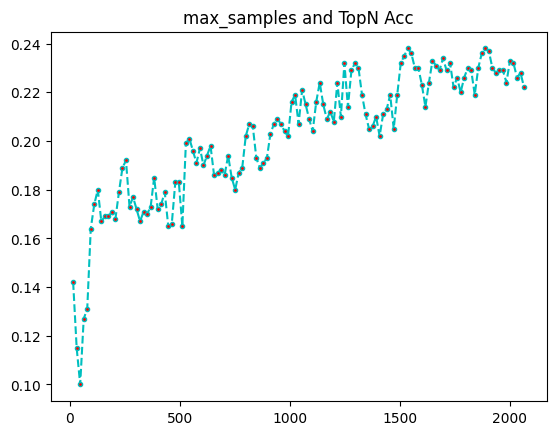

In [18]:
samples = list(range(16,2066,16))
rates = []
for i in samples:
    iforest = IsolationForest(n_estimators=100,
                              max_samples= i,
                              contamination=0.02,
                              max_features=5,
                              random_state=1
                              )
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    n = 1000
    df =  data.sort_values(by='scores',ascending=True)
    df = df.head(n)
    rate = df[df['Class']==1].shape[0]/n
    print('Top{}의 정확도는:{}'.format(n,rate))
    rates.append(rate)

import matplotlib.pyplot as plt
plt.plot(samples,rates, linestyle='--', marker='.',color='c',markerfacecolor='red')
plt.title('max_samples and TopN Acc')
plt.show()


Top1000의 정확도:0.105
Top1000의 정확도:0.234
Top1000의 정확도:0.227
Top1000의 정확도:0.231
Top1000의 정확도:0.238
Top1000의 정확도:0.206
Top1000의 정확도:0.231
Top1000의 정확도:0.218
Top1000의 정확도:0.247
Top1000의 정확도:0.228
Top1000의 정확도:0.242
Top1000의 정확도:0.248
Top1000의 정확도:0.228
Top1000의 정확도:0.234
Top1000의 정확도:0.245
Top1000의 정확도:0.241
Top1000의 정확도:0.248
Top1000의 정확도:0.221
Top1000의 정확도:0.248
Top1000의 정확도:0.249
Top1000의 정확도:0.242
Top1000의 정확도:0.243
Top1000의 정확도:0.225
Top1000의 정확도:0.228
Top1000의 정확도:0.23
Top1000의 정확도:0.233
Top1000의 정확도:0.235
Top1000의 정확도:0.248
Top1000의 정확도:0.243
Top1000의 정확도:0.247
Top1000의 정확도:0.254
Top1000의 정확도:0.251
Top1000의 정확도:0.252
Top1000의 정확도:0.236
Top1000의 정확도:0.244
Top1000의 정확도:0.233
Top1000의 정확도:0.235
Top1000의 정확도:0.223
Top1000의 정확도:0.246
Top1000의 정확도:0.244
Top1000의 정확도:0.255
Top1000의 정확도:0.251
Top1000의 정확도:0.249
Top1000의 정확도:0.254
Top1000의 정확도:0.251
Top1000의 정확도:0.257
Top1000의 정확도:0.242
Top1000의 정확도:0.261
Top1000의 정확도:0.235
Top1000의 정확도:0.243
Top1000의 정확도:0.246
Top1000의 정확도:0.246
Top1000의 정확도:

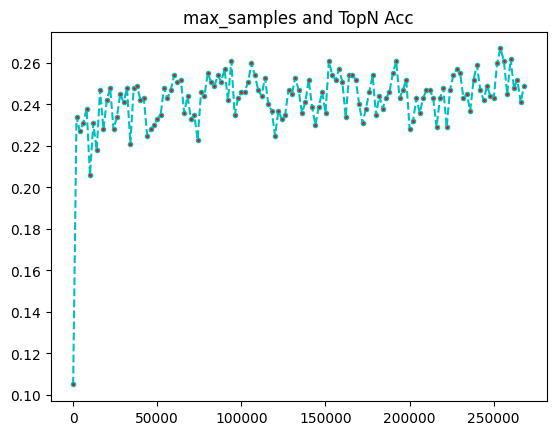

In [19]:
samples = list(range(50,270000,2000))
rates = []

for i in samples:
    iforest = IsolationForest(n_estimators=100,
                              max_samples = i,
                              contamination=0.02,
                              max_features=5,
                              random_state=1
                              )
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    n = 1000
    df =  data.sort_values(by='scores',ascending=True)
    df = df.head(n)
    rate = df[df['Class']==1].shape[0]/n
    print('Top{}의 정확도:{}'.format(n,rate))
    rates.append(rate)

import matplotlib.pyplot as plt
plt.plot(samples,rates, linestyle='--', marker='.',color='c',markerfacecolor='red')
plt.title('max_samples and TopN Acc')
plt.show()

> ### final test

In [20]:
iforest = IsolationForest(n_estimators=250,
                          max_samples = 125000,
                          contamination=0.05,
                          max_features=5,
                          random_state=1
                          )
data['label'] = iforest.fit_predict(X)
data['scores'] = iforest.decision_function(X)
n = 1000
df =  data.sort_values(by='scores',ascending=True)
df = df.head(n)
rate = df[df['Class']==1].shape[0]/n
print('Top{}의 정확도는:{}'.format(n,rate))
# 출력 결과: Top1000의 정확도는:0.251

# Top1000 데이터 저장
# df.to_csv('df.csv',header=True,index=False)


Top1000의 정확도는:0.251
